In [ ]:
!pip install bert-extractive-summarizer
!pip install rouge

     |████████████████████████████████| 2.8 MB 8.4 MB/s 
     |████████████████████████████████| 636 kB 68.2 MB/s 
     |████████████████████████████████| 895 kB 56.5 MB/s 
     |████████████████████████████████| 3.3 MB 34.5 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from summarizer import Summarizer,TransformerSummarizer
from rouge import Rouge
import pandas as pd

In [ ]:
rouge = Rouge()
GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
!mkdir MinimumLength

In [ ]:
ft_min_length = []
for j in range(50,101,10):
  data = []
  for i in range(1,68):
    f = open('/content/drive/MyDrive/DataSet/caseno'+str(i)+'.txt', 'r')
    body = f.read()
    system_summary = ''.join(GPT2_model(body, min_length=j))
    f = open('/content/drive/MyDrive/DataSet/caseno'+str(i)+'_summary.txt', 'r')
    reference_summary = f.read()
    rouge_score = rouge.get_scores(system_summary, reference_summary)
    l1 = list(rouge_score[0].get("rouge-1").values())
    l2 = list(rouge_score[0].get("rouge-2").values())
    l3 = list(rouge_score[0].get("rouge-l").values())
    l0 = ["caseno"+str(i)+".txt"]
    data.append(l0+l1+l2+l3)
  print(j, "done")
  df=pd.DataFrame(data, columns=["file_name", "Rouge-1(F1)", "Rouge-1(P)", "Rouge-1(R)", "Rouge-2(F1)", "Rouge-2(P)", "Rouge-2(R)",  "Rouge-L(F1)", "Rouge-L(P)", "Rouge-L(R)"])
  file_name = "MinimumLength/FT_GPT2_medium_ML_"+str(j)+".csv"
  df.to_csv(file_name, index=False)

50 done
60 done
70 done
80 done
90 done
100 done


[[0.3209752325395332, 0.4483347112757987, 0.3617017394361875, 0.16845846643402443, 0.25785927714784845, 0.19346562744301854, 0.29180813147225687, 0.4074078031079281, 0.3286539530949433], [0.3251873697521503, 0.4548166354721267, 0.36716932837454447, 0.17174240319881431, 0.2642470359036049, 0.19807504475526905, 0.29691372905419217, 0.415737003240175, 0.33534021925621577], [0.32860687931432625, 0.4529418061426993, 0.3696264913957888, 0.17447989471556172, 0.2637923169787755, 0.20091480521052243, 0.2994977469804607, 0.41347525107352123, 0.3371170573304452], [0.33328116963111126, 0.45911657445542237, 0.37282933822995346, 0.17790199282051505, 0.26774077848880445, 0.20276450776671356, 0.30378638633170046, 0.41865230314090307, 0.3397951139518991], [0.32865140241077256, 0.4548453977785479, 0.3692430904631269, 0.174800660930605, 0.264303477956694, 0.20006275138868035, 0.29905849987306315, 0.4148188206645844, 0.3362325907299624], [0.3288171426171258, 0.46039995982163084, 0.37118088317411635, 0.180

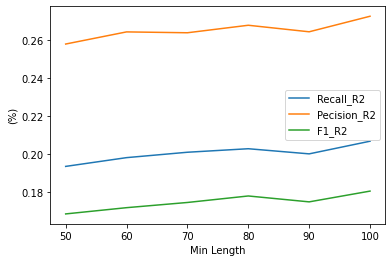

In [ ]:
import matplotlib.pyplot as plt
mean_ML = []

for i in range(50,101,10):
  file_name = "MinimumLength/FT_GPT2_medium_ML_"+str(i)+".csv"
  df = pd.read_csv(file_name)
  mean_ML.append(df.mean(axis=0).to_list())
print(mean_ML)
df=pd.DataFrame(mean_ML, columns=["Rouge-1(F1)", "Rouge-1(P)", "Rouge-1(R)", "Rouge-2(F1)", "Rouge-2(P)", "Rouge-2(R)",  "Rouge-L(F1)", "Rouge-L(P)", "Rouge-L(R)"])
df.to_csv("FT_GPT2_medium_ML_MEAN.csv", index=False)

plt.figure()
plt.plot(range(50,101,10),[i[5] for i in mean_ML], label="Recall_R2")
plt.plot(range(50,101,10),[i[4] for i in mean_ML], label="Pecision_R2")
plt.plot(range(50,101,10),[i[3] for i in mean_ML], label="F1_R2")
plt.xlabel("Min Length")
plt.legend()
plt.ylabel("(%)")
plt.savefig("FT_GPT2_medium_ML_Mean.svg")

In [ ]:
ft_ratio=[]
for j in range(2,9,1):
  rt=float(j)/10
  data = []
  for i in range(1,68):
    f = open('/content/drive/MyDrive/DataSet/caseno'+str(i)+'.txt', 'r')
    body = f.read()
    system_summary = ''.join(GPT2_model(body, ratio=rt))
    f = open('/content/drive/MyDrive/DataSet/caseno'+str(i)+'_summary.txt', 'r')
    reference_summary = f.read()
    rouge_score = rouge.get_scores(system_summary, reference_summary)
    l1 = list(rouge_score[0].get("rouge-1").values())
    l2 = list(rouge_score[0].get("rouge-2").values())
    l3 = list(rouge_score[0].get("rouge-l").values())
    l0 = ["caseno"+str(i)+".txt"]
    data.append(l0+l1+l2+l3)
    print(i, "done")
  print(rt, " File Done:")
  df=pd.DataFrame(data, columns=["file_name", "Rouge-1(F1)", "Rouge-1(P)", "Rouge-1(R)", "Rouge-2(F1)", "Rouge-2(P)", "Rouge-2(R)",  "Rouge-L(F1)", "Rouge-L(P)", "Rouge-L(R)"])
  fn="MinimumLength/FT_GPT2_med_RT_"+str(j)+".csv"
  df.to_csv(fn, index=False)

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
0.2  File Done:
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59

[[0.3250423706903626, 0.45088938650738614, 0.3646668667000398, 0.17170909323482184, 0.25918217245142233, 0.1959014856047355, 0.2975528607747486, 0.4130230016132254, 0.3338274855038802], [0.3842159409067949, 0.4234781704236324, 0.38813917037410633, 0.21579988773209863, 0.24833963474405454, 0.21798460041070586, 0.35363462638843923, 0.3902090831974672, 0.357222840839925], [0.4262378007126275, 0.3967077546857135, 0.3959359229785639, 0.25609853188953574, 0.23317662455961513, 0.23050619388365934, 0.3956650730894785, 0.36762648321865093, 0.3671484943987343], [0.47403473408311786, 0.38035016290891, 0.4072280822245553, 0.2996032256336734, 0.2240784817254585, 0.24247427213792516, 0.4432150412352009, 0.355036402922383, 0.3803491194185501], [0.5042992547683598, 0.36243083638164114, 0.4069617309286733, 0.3306514631541445, 0.2130326187731771, 0.24533861013363564, 0.4744448132696897, 0.34007722795952755, 0.3822791454374474], [0.5386012264464832, 0.35089326965247, 0.41003597811687964, 0.37009829827283

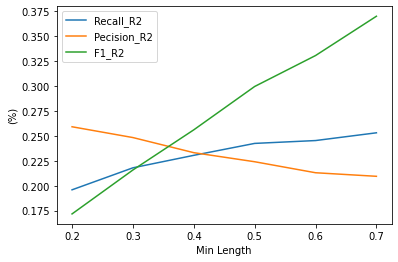

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
mean_RT=[]

for i in range(2,8,1):
  fn="MinimumLength/FT_GPT2_med_RT_"+str(i)+".csv"
  df=pd.read_csv(fn)
  mean_RT.append(df.mean(axis=0).to_list())
print(mean_RT)
df=pd.DataFrame(mean_RT, columns=["Rouge-1(F1)", "Rouge-1(P)", "Rouge-1(R)", "Rouge-2(F1)", "Rouge-2(P)", "Rouge-2(R)",  "Rouge-L(F1)", "Rouge-L(P)", "Rouge-L(R)"])
df.to_csv("FT_GPT2_med_RT_MEAN.csv", index=False)
mean_ML_R2_R=[i[6] for i in mean_RT]
plt.figure()
plt.plot((1/10)*np.array(range(2,8,1)),[i[5] for i in mean_RT], label="Recall_R2")
plt.plot((1/10)*np.array(range(2,8,1)),[i[4] for i in mean_RT], label="Pecision_R2")
plt.plot((1/10)*np.array(range(2,8,1)),[i[3] for i in mean_RT], label="F1_R2")
plt.xlabel("Ratio")
plt.legend()
plt.ylabel("(%)")
plt.savefig("FT_GPT2_med_RT_Mean.svg")

In [ ]:
ft_rat=[]
for j in range(10,15):
  data=[]
  for i in range(1, 68):
    f = open('/content/drive/MyDrive/DataSet/caseno'+str(i)+'.txt', 'r')
    body=f.read()
    system_summary = ''.join(GPT2_model(body, num_sentences=j))
    f = open("/content/drive/MyDrive/DataSet/caseno"+str(i)+"_summary.txt", "r")
    reference_summary=f.read()
    rouge_score=rouge.get_scores(system_summary, reference_summary)
    l1=list(rouge_score[0].get("rouge-1").values())
    l2=list(rouge_score[0].get("rouge-2").values())
    l3=list(rouge_score[0].get("rouge-l").values())
    l0=["caseno"+str(i)+".txt"]
    data.append(l0+l1+l2+l3)
  print(j, " File Done:")
  df=pd.DataFrame(data, columns=["file_name", "Rouge-1(F1)", "Rouge-1(P)", "Rouge-1(R)", "Rouge-2(F1)", "Rouge-2(P)", "Rouge-2(R)",  "Rouge-L(F1)", "Rouge-L(P)", "Rouge-L(R)"])
  fn="MinimumLength/FT_GPT2_med_NS_"+str(j)+".csv"
  df.to_csv(fn, index=False)

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
mean_NS=[]

for i in range(3,15,1):
  fn="MinimumLength/FT_GPT2_med_NS_"+str(i)+".csv"
  df=pd.read_csv(fn)
  mean_NS.append(df.mean(axis=0).to_list())
print(mean_RT)
df=pd.DataFrame(mean_NS, columns=["Rouge-1(F1)", "Rouge-1(P)", "Rouge-1(R)", "Rouge-2(F1)", "Rouge-2(P)", "Rouge-2(R)",  "Rouge-L(F1)", "Rouge-L(P)", "Rouge-L(R)"])
df.to_csv("FT_GPT2_med_NS_MEAN.csv", index=False)
plt.figure()
plt.plot(range(3,15,1),[100*i[5] for i in mean_NS], label="Recall_R2")
plt.plot(range(3,15,1),[100*i[4] for i in mean_NS], label="Pecision_R2")
plt.plot(range(3,15,1),[100*i[3] for i in mean_NS], label="F1_R2")
plt.xlabel("No of Sentences")
plt.legend()
plt.ylabel("(%)")
plt.savefig("FT_GPT2_med_NS_Mean.svg")

FileNotFoundError: ignored